In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Data\macrodata.csv', index_col = 0, parse_dates = True)
df

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.980,139.7,2.82,5.8,177.146,0.00,0.00
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.150,141.7,3.08,5.1,177.830,2.34,0.74
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.350,140.5,3.82,5.3,178.657,2.74,1.09
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.370,140.0,4.33,5.6,179.386,0.27,4.06
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.540,139.6,3.50,5.2,180.007,2.31,1.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2008-09-30,2008,3,13324.600,9267.7,1990.693,991.551,9838.3,216.889,1474.7,1.17,6.0,305.270,-3.16,4.33
2008-12-31,2008,4,13141.920,9195.3,1857.661,1007.273,9920.4,212.174,1576.5,0.12,6.9,305.952,-8.79,8.91
2009-03-31,2009,1,12925.410,9209.2,1558.494,996.287,9926.4,212.671,1592.8,0.22,8.1,306.547,0.94,-0.71
2009-06-30,2009,2,12901.504,9189.0,1456.678,1023.528,10077.5,214.469,1653.6,0.18,9.2,307.226,3.37,-3.19


In [3]:
df.index

DatetimeIndex(['1959-03-31', '1959-06-30', '1959-09-30', '1959-12-31',
               '1960-03-31', '1960-06-30', '1960-09-30', '1960-12-31',
               '1961-03-31', '1961-06-30',
               ...
               '2007-06-30', '2007-09-30', '2007-12-31', '2008-03-31',
               '2008-06-30', '2008-09-30', '2008-12-31', '2009-03-31',
               '2009-06-30', '2009-09-30'],
              dtype='datetime64[ns]', length=203, freq=None)

<AxesSubplot:>

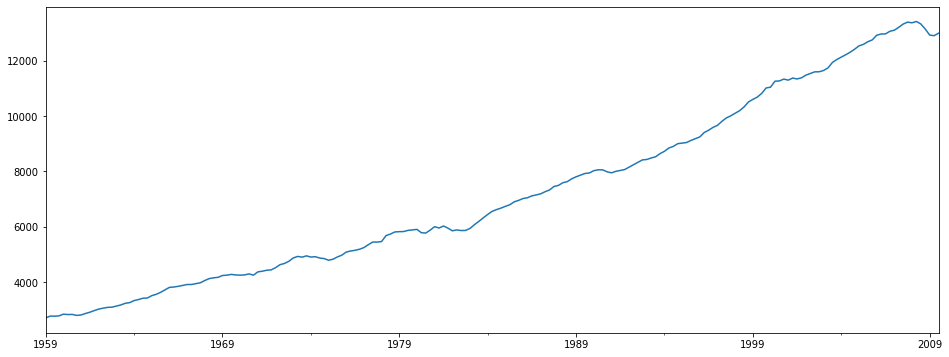

In [4]:
df['realgdp'].plot(figsize = (16,6))

In [5]:
from statsmodels.tsa.filters.hp_filter import hpfilter #Hodrick Presscot Filter

In [6]:
gdp_cycle, gdp_trend = hpfilter(df['realgdp'], lamb = 1600)

In [8]:
gdp_cycle, gdp_trend

(1959-03-31     39.511915
 1959-06-30     80.088532
 1959-09-30     48.875455
 1959-12-31     30.591933
 1960-03-31     64.882667
                  ...    
 2008-09-30    102.018455
 2008-12-31   -107.269472
 2009-03-31   -349.047706
 2009-06-30   -397.557073
 2009-09-30   -333.115243
 Name: realgdp_cycle, Length: 203, dtype: float64,
 1959-03-31     2670.837085
 1959-06-30     2698.712468
 1959-09-30     2726.612545
 1959-12-31     2754.612067
 1960-03-31     2782.816333
                   ...     
 2008-09-30    13222.581545
 2008-12-31    13249.189472
 2009-03-31    13274.457706
 2009-06-30    13299.061073
 2009-09-30    13323.456243
 Name: realgdp_trend, Length: 203, dtype: float64)

<AxesSubplot:>

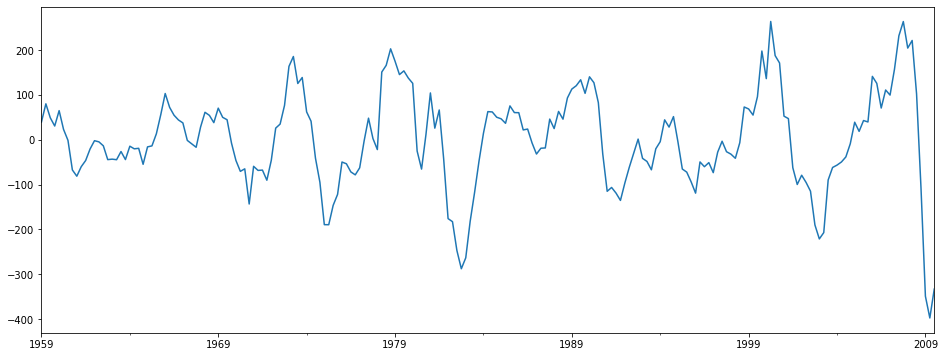

In [9]:
gdp_cycle.plot(figsize=(16,6))

<AxesSubplot:>

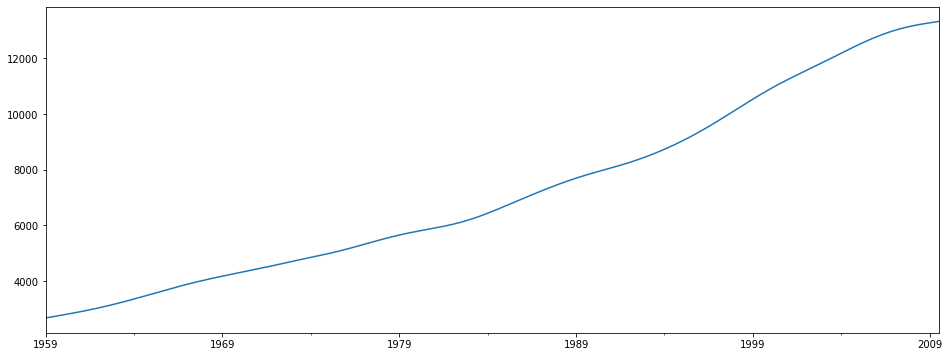

In [10]:
gdp_trend.plot(figsize=(16,6))

<AxesSubplot:>

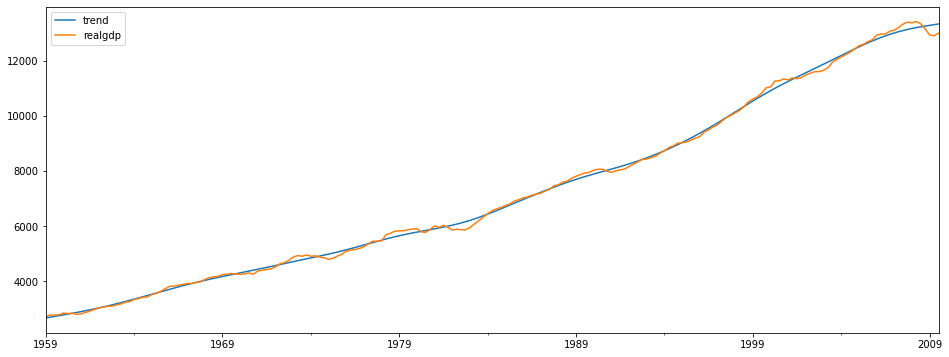

In [13]:
df['trend'] = gdp_trend
df['cycle'] = gdp_cycle
df[['trend', 'realgdp']].plot(figsize=(16,6))

In [19]:
df.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint,trend,cycle
1959-03-31,1959,1,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00,2670.837085,39.511915
1959-06-30,1959,2,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74,2698.712468,80.088532
1959-09-30,1959,3,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09,2726.612545,48.875455
1959-12-31,1959,4,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06,2754.612067,30.591933
1960-03-31,1960,1,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19,2782.816333,64.882667


<AxesSubplot:>

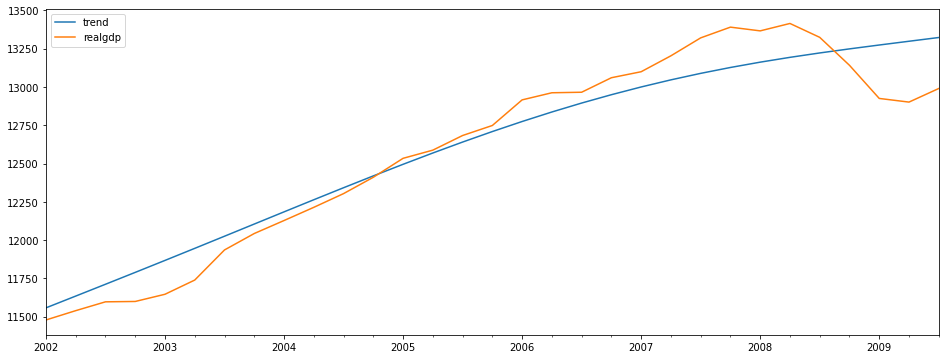

In [24]:
df[['trend','realgdp']]['2002-01-01':].plot(figsize = (16,6))

# ETS Decomposition

In [2]:
df2 = pd.read_csv(r'Data/airline_passengers.csv', index_col = 'Month', parse_dates = True)
df2.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [32]:
df2.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

In [18]:
df2.dropna(inplace = True)

<AxesSubplot:xlabel='Month'>

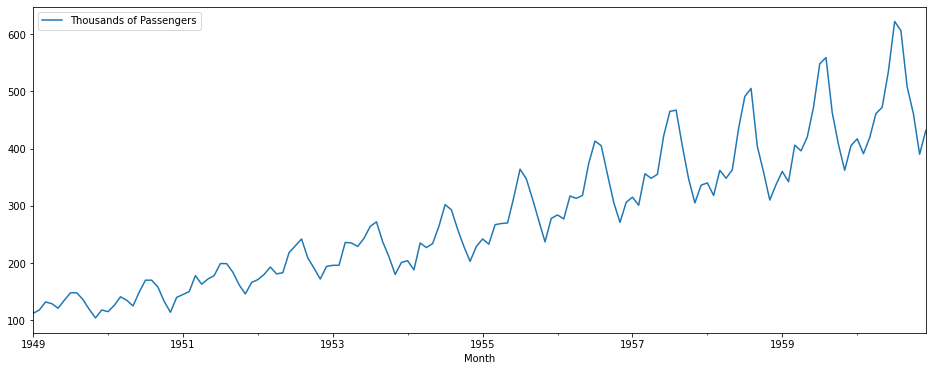

In [19]:
df2.plot(figsize=(16,6)) # It has seasonality and trend components

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [21]:
result = seasonal_decompose(df2['Thousands of Passengers'], model = 'multiplicative') #using multiplicative additive model as
#trend seems to be non linear

In [23]:
result.trend.head(10)

Month
1949-01-01           NaN
1949-02-01           NaN
1949-03-01           NaN
1949-04-01           NaN
1949-05-01           NaN
1949-06-01           NaN
1949-07-01    126.791667
1949-08-01    127.250000
1949-09-01    127.958333
1949-10-01    128.583333
Name: trend, dtype: float64

In [24]:
result.seasonal.head(10)

Month
1949-01-01    0.910230
1949-02-01    0.883625
1949-03-01    1.007366
1949-04-01    0.975906
1949-05-01    0.981378
1949-06-01    1.112776
1949-07-01    1.226556
1949-08-01    1.219911
1949-09-01    1.060492
1949-10-01    0.921757
Name: seasonal, dtype: float64

In [25]:
result.resid.head(10)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01    0.951664
1949-08-01    0.953401
1949-09-01    1.002220
1949-10-01    1.004028
Name: resid, dtype: float64

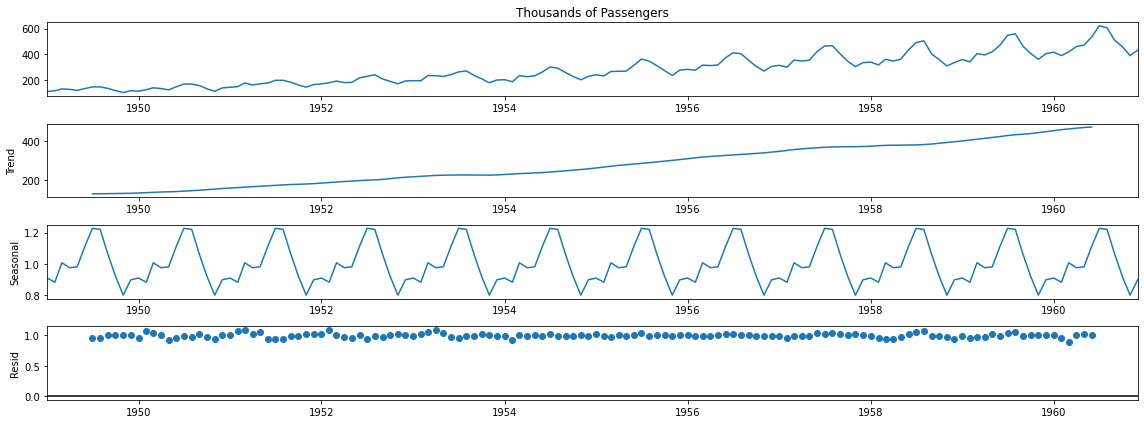

In [26]:
from pylab import rcParams
rcParams['figure.figsize'] = 16,6
result.plot();

In [34]:
df2['6-monthSMA'] = df2['Thousands of Passengers'].rolling(window=6).mean() #using SMA model
df2['12-monthSMA'] = df2['Thousands of Passengers'].rolling(window=12).mean()
df2

,Thousands of Passengers,6-monthSMA,12-monthSMA
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,NaN,NaN
1949-03-01,132,NaN,NaN
1949-04-01,129,NaN,NaN
1949-05-01,121,NaN,NaN
...,...,...,...
1960-08-01,606,519.166667,463.333333
1960-09-01,508,534.000000,467.083333
1960-10-01,461,534.000000,471.583333


<AxesSubplot:xlabel='Month'>

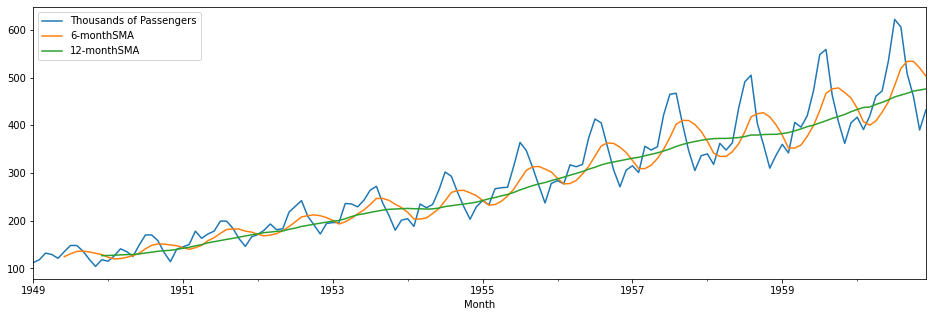

In [35]:
df2.plot(figsize=(16,5))

<AxesSubplot:xlabel='Month'>

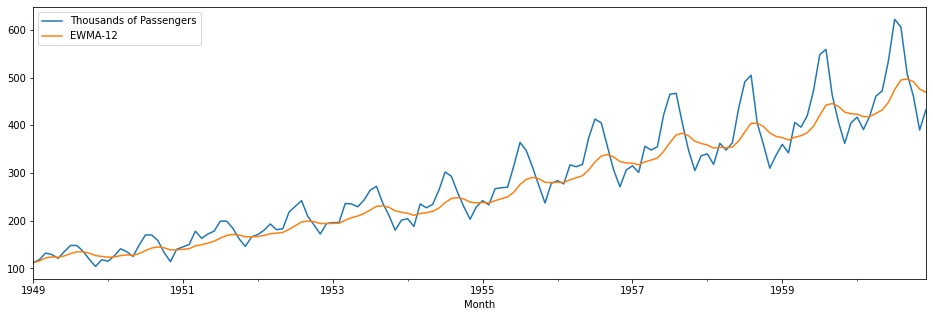

In [37]:
df2['EWMA-12'] = df2['Thousands of Passengers'].ewm(span=12).mean() #taking default alpha value
df2[['Thousands of Passengers', 'EWMA-12']].plot(figsize = (16,5))
#here seasonality trend is clear at the beginning and end points using EWMA method

## Simple Exponential Smoothing and Holt Winters Modelling

In [3]:
df2.dropna(inplace = True)

In [9]:
df2.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [10]:
df2.index.freq = 'MS'
df2.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq='MS')

In [14]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [17]:
span = 12
alpha = 2/(span+1)
df2['EWMA12'] = df2['Thousands of Passengers'].ewm(alpha=alpha, adjust = False).mean()
df2

,Thousands of Passengers,EWMA12
Month,,
1949-01-01,112,112.000000
1949-02-01,118,112.923077
1949-03-01,132,115.857988
1949-04-01,129,117.879836
1949-05-01,121,118.359861
...,...,...
1960-08-01,606,494.898619
1960-09-01,508,496.914216
1960-10-01,461,491.388952


In [23]:
model = SimpleExpSmoothing(df2['Thousands of Passengers']) #performing the same as EWMA for single alpha
fitted_model = model.fit(smoothing_level=alpha, optimized=False)
df2['SESM12'] = pd.DataFrame(fitted_model.fittedvalues).shift(-1)
df2.dropna(inplace = True)
df2

,Thousands of Passengers,EWMA12,SESM12
Month,,,
1949-01-01,112,112.000000,112.000000
1949-02-01,118,112.923077,112.923077
1949-03-01,132,115.857988,115.857988
1949-04-01,129,117.879836,117.879836
1949-05-01,121,118.359861,118.359861
...,...,...,...
1960-06-01,535,447.916254,447.916254
1960-07-01,622,474.698368,474.698368
1960-08-01,606,494.898619,494.898619


<AxesSubplot:xlabel='Month'>

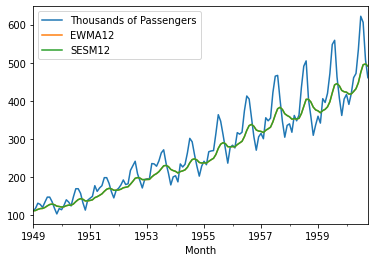

In [24]:
df2.plot()

In [28]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing #for double smoothing to incorporate trend(additive adjustment)
 
df2['DES_add_12'] = ExponentialSmoothing(df2['Thousands of Passengers'], trend = 'add').fit().fittedvalues.shift(-1)
df2

,Thousands of Passengers,EWMA12,SESM12,DES_add_12
Month,,,,
1949-01-01,112,112.000000,112.000000,114.102394
1949-02-01,118,112.923077,112.923077,120.040657
1949-03-01,132,115.857988,115.857988,134.001539
1949-04-01,129,117.879836,117.879836,131.085845
1949-05-01,121,118.359861,118.359861,123.110263
...,...,...,...,...
1960-06-01,535,447.916254,447.916254,536.768892
1960-07-01,622,474.698368,474.698368,623.656106
1960-08-01,606,494.898619,494.898619,608.168786


<AxesSubplot:xlabel='Month'>

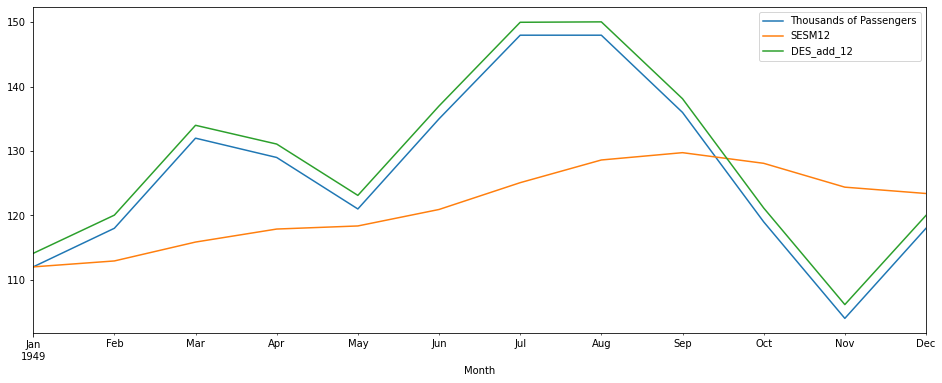

In [32]:
df2[['Thousands of Passengers','SESM12','DES_add_12']].iloc[:12].plot(figsize = (16,6)) 
#We can see the with double exponential smoothing the data is fitting quite well as compared to SESM

In [33]:
df2['DES_mul_12'] = ExponentialSmoothing(df2['Thousands of Passengers'], trend = 'mul').fit().fittedvalues.shift(-1)
df2

,Thousands of Passengers,EWMA12,SESM12,DES_add_12,DES_mul_12
Month,,,,,
1949-01-01,112,112.000000,112.000000,114.102394,113.990701
1949-02-01,118,112.923077,112.923077,120.040657,120.031669
1949-03-01,132,115.857988,115.857988,134.001539,134.235979
1949-04-01,129,117.879836,117.879836,131.085845,131.270786
1949-05-01,121,118.359861,118.359861,123.110263,123.156267
...,...,...,...,...,...
1960-06-01,535,447.916254,447.916254,536.768892,544.020089
1960-07-01,622,474.698368,474.698368,623.656106,632.423449
1960-08-01,606,494.898619,494.898619,608.168786,616.673652


<AxesSubplot:xlabel='Month'>

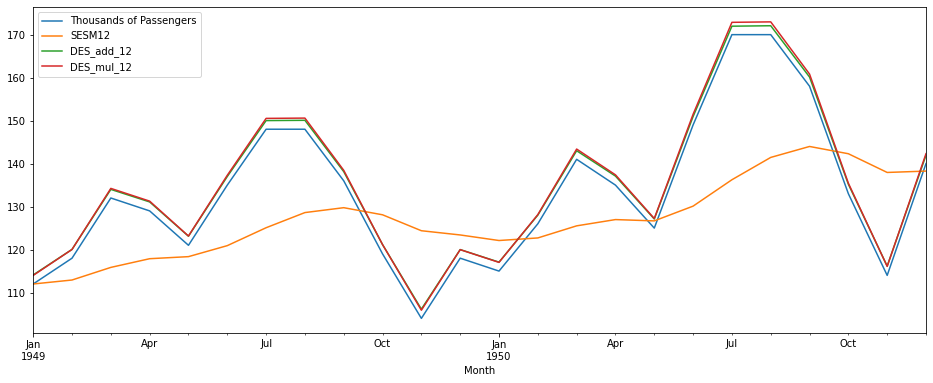

In [39]:
df2[['Thousands of Passengers','SESM12','DES_add_12', 'DES_mul_12']].iloc[:24].plot(figsize = (16,6)) 

In [42]:
df2['TES_mul_12'] = ExponentialSmoothing(df2['Thousands of Passengers'], trend = 'mul', seasonal='mul', seasonal_periods=12).fit().fittedvalues

d:\Anaconda3\envs\timeseries\lib\site-packages\statsmodels\tsa\holtwinters\model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


<AxesSubplot:xlabel='Month'>

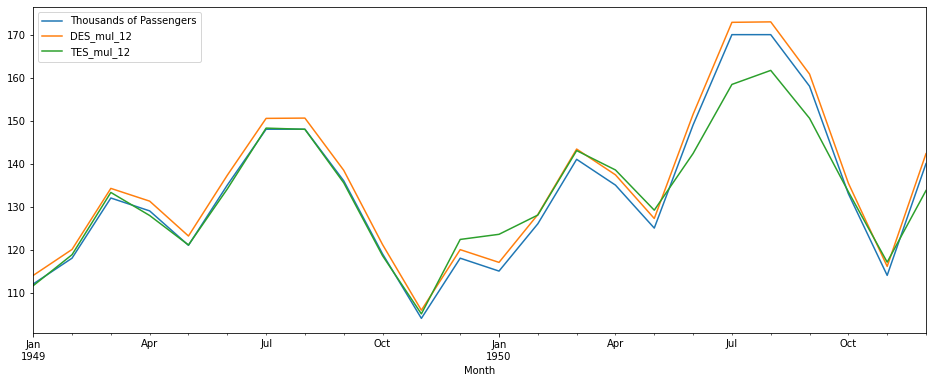

In [46]:
df2[['Thousands of Passengers','DES_mul_12', 'TES_mul_12']].iloc[:24].plot(figsize=(16,6))
#Double exponential smoothing performing better as compared to triple exponential smoothing for 1st 2 years and for last
#2 years Triple is performing better and better for forecasting